In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

### Connecting MongoDB server

In [2]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [3]:
mongo_db = mongo_conn['spearmint']

### Loading document from database

In [4]:
collection_list = mongo_db.list_collection_names()

In [5]:
exp_name = "sep_levy"

In [39]:
jobs_initial5_Mk10_Mj1_exp = []
jobs_initial5_Mk50_Mj1_exp = []
jobs_initial5_Mk150_Mj1_exp = []
jobs_initial5_Mk200_Mj1_exp = []
jobs_initial5_Mk250_Mj1_exp = []
jobs_initial5_Mk300_Mj1_exp = []

jobs_initial5_Mk50_Mj1_hyperprior_v2_exp = []
jobs_initial5_Mk200_Mj1_hyperprior_v2_exp = []
jobs_initial5_Mk250_Mj1_hyperprior_v2_exp = []

jobs_saa_cumulative_multi_exp = []
jobs_saa_cumulative_exp = []
jobs_saa_cumulative_v2_exp = []

recomm_initial5_Mk10_Mj1_exp = []
recomm_initial5_Mk50_Mj1_exp = []
recomm_initial5_Mk150_Mj1_exp = []
recomm_initial5_Mk200_Mj1_exp = []
recomm_initial5_Mk250_Mj1_exp = []
recomm_initial5_Mk300_Mj1_exp = []

recomm_initial5_Mk50_Mj1_hyperprior_v2_exp = []
recomm_initial5_Mk200_Mj1_hyperprior_v2_exp = []
recomm_initial5_Mk250_Mj1_hyperprior_v2_exp = []

recomm_saa_cumulative_multi_exp = []
recomm_saa_cumulative_exp = []
recomm_saa_cumulative_v2_exp = []

for i in range(25):
    if "%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i)])
    if "%s_initial5_Mk150_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk150_Mj1_exp.append(mongo_db["%s_initial5_Mk150_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk250_Mj1_exp.append(mongo_db["%s_initial5_Mk250_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk300_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk300_Mj1_exp.append(mongo_db["%s_initial5_Mk300_Mj1-%d.jobs"%(exp_name,i)]) 
    
    if "%s_initial5_Mk50_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk50_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk200_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk200_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk250_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk250_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i)]) 
    
    if "%s_cumulative_saa_multi-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_multi_exp.append(mongo_db["%s_cumulative_saa_multi-%d.jobs"%(exp_name,i)])
    if "%s_cumulative_saa-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_exp.append(mongo_db["%s_cumulative_saa-%d.jobs"%(exp_name,i)])
    if "%s_cumulative_saa_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_v2_exp.append(mongo_db["%s_cumulative_saa_v2-%d.jobs"%(exp_name,i)])
    
    if "%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i)])
    if "%s_initial5_Mk150_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk150_Mj1_exp.append(mongo_db["%s_initial5_Mk150_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk250_Mj1_exp.append(mongo_db["%s_initial5_Mk250_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk300_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk300_Mj1_exp.append(mongo_db["%s_initial5_Mk300_Mj1-%d.recommendations"%(exp_name,i)]) 
        
    if "%s_initial5_Mk50_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk50_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk200_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk200_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk250_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk250_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i)]) 
    
    if "%s_cumulative_saa_multi-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_multi_exp.append(mongo_db["%s_cumulative_saa_multi-%d.recommendations"%(exp_name,i)])
    if "%s_cumulative_saa-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_exp.append(mongo_db["%s_cumulative_saa-%d.recommendations"%(exp_name,i)])
    if "%s_cumulative_saa_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_v2_exp.append(mongo_db["%s_cumulative_saa_v2-%d.recommendations"%(exp_name,i)])

### Get objective method gets the predicted optimal value in GP model

In [40]:
initial5_Mk10_Mj1_objs = functions.get_objective(recomm_initial5_Mk10_Mj1_exp)
initial5_Mk50_Mj1_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_exp)
initial5_Mk150_Mj1_objs = functions.get_objective(recomm_initial5_Mk150_Mj1_exp)
initial5_Mk200_Mj1_objs = functions.get_objective(recomm_initial5_Mk200_Mj1_exp)
initial5_Mk250_Mj1_objs = functions.get_objective(recomm_initial5_Mk250_Mj1_exp)
initial5_Mk300_Mj1_objs = functions.get_objective(recomm_initial5_Mk300_Mj1_exp)

initial5_Mk50_Mj1_hyperprior_v2_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_hyperprior_v2_exp)
initial5_Mk200_Mj1_hyperprior_v2_objs = functions.get_objective(recomm_initial5_Mk200_Mj1_hyperprior_v2_exp)
initial5_Mk250_Mj1_hyperprior_v2_objs = functions.get_objective(recomm_initial5_Mk250_Mj1_hyperprior_v2_exp)

saa_cumulative_multi = functions.get_objective(recomm_saa_cumulative_multi_exp)
saa_cumulative = functions.get_objective(recomm_saa_cumulative_exp)
saa_cumulative_v2 = functions.get_objective(recomm_saa_cumulative_v2_exp)

In [41]:
locs_initial5_Mk10_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk10_Mj1_exp)
locs_initial5_Mk50_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_exp)
locs_initial5_Mk150_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk150_Mj1_exp)
locs_initial5_Mk200_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk200_Mj1_exp)
locs_initial5_Mk250_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk250_Mj1_exp)
locs_initial5_Mk300_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk300_Mj1_exp)

locs_initial5_Mk50_Mj1_hyperprior_v2_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_hyperprior_v2_exp)
locs_initial5_Mk200_Mj1_hyperprior_v2_exp = functions.get_recomm_loc(recomm_initial5_Mk200_Mj1_hyperprior_v2_exp)
locs_initial5_Mk250_Mj1_hyperprior_v2_exp = functions.get_recomm_loc(recomm_initial5_Mk250_Mj1_hyperprior_v2_exp)

locs_saa_cumulative_multi = functions.get_recomm_loc(recomm_saa_cumulative_multi_exp)
locs_saa_cumulative = functions.get_recomm_loc(recomm_saa_cumulative_exp)
locs_saa_cumulative_v2 = functions.get_recomm_loc(recomm_saa_cumulative_v2_exp)

### Getting immediate Regret IR measure

In [42]:
def levy_4d(x1,x2,x3,x4):
	w1 = 1 + (x1-1)/4
	w2 = 1 + (x2-1)/4
	w3 = 1 + (x3-1)/4
	w4 = 1 + (x4-1)/4

	a = np.sin(np.pi * w1)**2
	b = ((w1-1)**2)*(1+10*(np.sin(np.pi*w1+1)**2)) + ((w2-1)**2)*(1+10*(np.sin(np.pi*w2+1)**2)) + ((w3-1)**2)*(1+10*(np.sin(np.pi*w3+1)**2)) 
	c = ((w4-1)**2) * (1 + (np.sin(2*np.pi*w4)**2))

	result = a + b + c

	return result

In [43]:
opt_val = 0

In [44]:
def get_sugg_obj_exp(locs_exp):
    obj_exp = []
    for exp_num in range(len(locs_exp)):
        objs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[exp_num])):
            objs_iter.append(levy_4d(*locs_cur_exp[idx]))
            
        obj_exp.append(objs_iter)
        
    return obj_exp

In [45]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - levy_4d(*input_list)))

In [46]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[0])):
            
            irs_iter.append(log_ir(locs_cur_exp[idx]))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [47]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs


In [48]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs



In [49]:
def get_std_err_irs(irs_exp):
    std_err_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        std_err_irs.append(np.std(cur_iter_irs))
        
    return std_err_irs

### Getting the 'real' value of functions at suggested locations

In [50]:
minimum = 35
for exp in locs_initial5_Mk150_Mj1_exp:
    minimum = minimum if len(exp) > minimum else len(exp)
    
locs_initial5_Mk150_Mj1_exp = [list_[:minimum] for list_ in locs_initial5_Mk150_Mj1_exp]

In [51]:
sugg_obj_initial5_Mk10_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk10_Mj1_exp)
sugg_obj_initial5_Mk50_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_exp)
sugg_obj_initial5_Mk150_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk150_Mj1_exp)
sugg_obj_initial5_Mk200_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk200_Mj1_exp)
sugg_obj_initial5_Mk250_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk250_Mj1_exp)
sugg_obj_initial5_Mk300_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk300_Mj1_exp)

sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_hyperprior_v2_exp)
sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_exp = get_sugg_obj_exp(locs_initial5_Mk200_Mj1_hyperprior_v2_exp)
sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_exp = get_sugg_obj_exp(locs_initial5_Mk250_Mj1_hyperprior_v2_exp)

sugg_obj_cumulative_saa_multi_exp = get_sugg_obj_exp(locs_saa_cumulative_multi)
sugg_obj_cumulative_saa_exp = get_sugg_obj_exp(locs_saa_cumulative)
sugg_obj_cumulative_saa_v2_exp = get_sugg_obj_exp(locs_saa_cumulative_v2)

#### averaging values of each experiments

In [52]:
avg_sugg_obj_initial5_Mk10_Mj1 = np.average(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk50_Mj1 = np.average(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk150_Mj1 = np.average(sugg_obj_initial5_Mk150_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk200_Mj1 = np.average(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk250_Mj1 = np.average(sugg_obj_initial5_Mk250_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk300_Mj1 = np.average(sugg_obj_initial5_Mk300_Mj1_exp, axis=0)

avg_sugg_obj_initial5_Mk50_Mj1_hyperprior_v2 = np.average(sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_exp, axis=0)
avg_sugg_obj_initial5_Mk200_Mj1_hyperprior_v2 = np.average(sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_exp, axis=0)
avg_sugg_obj_initial5_Mk250_Mj1_hyperprior_v2 = np.average(sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_exp, axis=0)

avg_sugg_obj_saa_cumulative_multi = np.average(sugg_obj_cumulative_saa_multi_exp, axis=0)
avg_sugg_obj_saa_cumulative = np.average(sugg_obj_cumulative_saa_exp, axis=0)
avg_sugg_obj_saa_cumulative_v2 = np.average(sugg_obj_cumulative_saa_v2_exp, axis=0)

In [53]:
sugg_obj_initial5_Mk10_Mj1_std_err = np.std(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
sugg_obj_initial5_Mk50_Mj1_std_err = np.std(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)
sugg_obj_initial5_Mk150_Mj1_std_err = np.std(sugg_obj_initial5_Mk150_Mj1_exp, axis=0)
sugg_obj_initial5_Mk200_Mj1_std_err = np.std(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)
sugg_obj_initial5_Mk250_Mj1_std_err = np.std(sugg_obj_initial5_Mk250_Mj1_exp, axis=0)
sugg_obj_initial5_Mk300_Mj1_std_err = np.std(sugg_obj_initial5_Mk300_Mj1_exp, axis=0)

sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_std_err = np.std(sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_exp, axis=0)
sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_std_err = np.std(sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_exp, axis=0)
sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_std_err = np.std(sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_exp, axis=0)

sugg_obj_cumulative_saa_multi_std_err = np.std(sugg_obj_cumulative_saa_multi_exp, axis=0)
sugg_obj_cumulative_saa_std_err = np.std(sugg_obj_cumulative_saa_exp, axis=0)
sugg_obj_cumulative_saa_v2_std_err = np.std(sugg_obj_cumulative_saa_v2_exp, axis=0)

### Getting IR values for look optimization performances

In [54]:
irs_initial5_Mk10_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk150_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk150_Mj1_exp)
irs_initial5_Mk200_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk300_Mj1_exp)

irs_initial5_Mk50_Mj1_hyperprior_v2_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_hyperprior_v2_exp)
irs_initial5_Mk200_Mj1_hyperprior_v2_exp = get_irs_whole_exp(locs_initial5_Mk200_Mj1_hyperprior_v2_exp)
irs_initial5_Mk250_Mj1_hyperprior_v2_exp = get_irs_whole_exp(locs_initial5_Mk250_Mj1_hyperprior_v2_exp)

irs_cumulative_saa_multi_exp = get_irs_whole_exp(locs_saa_cumulative_multi)
irs_cumulative_saa_exp = get_irs_whole_exp(locs_saa_cumulative)
irs_cumulative_saa_v2_exp = get_irs_whole_exp(locs_saa_cumulative_v2)

### Get averaged and median value of IR

In [55]:
irs_initial5_Mk10_Mj1_avg = get_avg_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_avg = get_avg_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk150_Mj1_avg = get_avg_irs(irs_initial5_Mk150_Mj1_exp)
irs_initial5_Mk200_Mj1_avg = get_avg_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_avg = get_avg_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_avg = get_avg_irs(irs_initial5_Mk300_Mj1_exp)

irs_initial5_Mk50_Mj1_hyperprior_v2_avg = get_avg_irs(irs_initial5_Mk50_Mj1_hyperprior_v2_exp)
irs_initial5_Mk200_Mj1_hyperprior_v2_avg = get_avg_irs(irs_initial5_Mk200_Mj1_hyperprior_v2_exp)
irs_initial5_Mk250_Mj1_hyperprior_v2_avg = get_avg_irs(irs_initial5_Mk250_Mj1_hyperprior_v2_exp)

irs_cumulative_saa_multi_avg = get_avg_irs(irs_cumulative_saa_multi_exp)
irs_cumulative_saa_avg = get_avg_irs(irs_cumulative_saa_exp)
irs_cumulative_saa_v2_avg = get_avg_irs(irs_cumulative_saa_v2_exp)

In [56]:
irs_initial5_Mk10_Mj1_median = get_median_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_median = get_median_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk150_Mj1_median = get_median_irs(irs_initial5_Mk150_Mj1_exp)
irs_initial5_Mk200_Mj1_median = get_median_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_median = get_median_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_median = get_median_irs(irs_initial5_Mk300_Mj1_exp)

irs_initial5_Mk50_Mj1_hyperprior_v2_median = get_median_irs(irs_initial5_Mk50_Mj1_hyperprior_v2_exp)
irs_initial5_Mk200_Mj1_hyperprior_v2_median = get_median_irs(irs_initial5_Mk200_Mj1_hyperprior_v2_exp)
irs_initial5_Mk250_Mj1_hyperprior_v2_median = get_median_irs(irs_initial5_Mk250_Mj1_hyperprior_v2_exp)

irs_saa_cumulative_multi_median = get_median_irs(irs_cumulative_saa_multi_exp)
irs_saa_cumulative_median = get_median_irs(irs_cumulative_saa_exp)
irs_saa_cumulative_v2_median = get_median_irs(irs_cumulative_saa_v2_exp)

In [57]:
irs_initial5_Mk10_Mj1_std_err = get_std_err_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_std_err = get_std_err_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk150_Mj1_std_err = get_std_err_irs(irs_initial5_Mk150_Mj1_exp)
irs_initial5_Mk200_Mj1_std_err = get_std_err_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_std_err = get_std_err_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_std_err = get_std_err_irs(irs_initial5_Mk300_Mj1_exp)

irs_cumulative_saa_multi_std_err = get_std_err_irs(irs_cumulative_saa_multi_exp)
irs_cumulative_saa_std_err = get_std_err_irs(irs_cumulative_saa_exp)
irs_cumulative_saa_v2_std_err = get_std_err_irs(irs_cumulative_saa_v2_exp)

### Plotting the real function value at suggested location

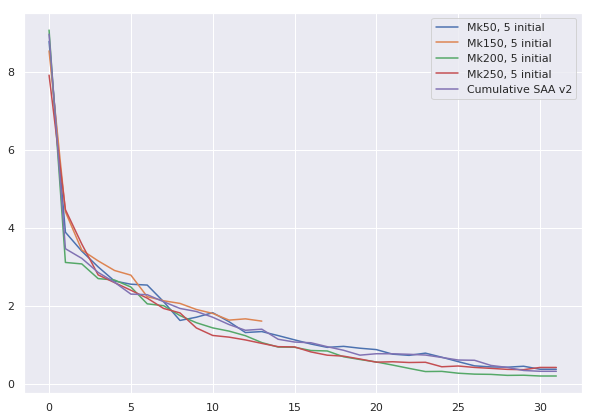

In [58]:
plt.figure(figsize=(10,7))
#plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk150_Mj1[3:], label="Mk150, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")

plt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial")
#plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")
plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")
#plt.plot(avg_sugg_obj_saa_cumulative_multi[3:], label="SAA cumulative multi start")
#plt.plot(avg_sugg_obj_saa_cumulative[3:], label='SAA cumulative')
plt.legend()
plt.show()

### SAA vs fixed Mk

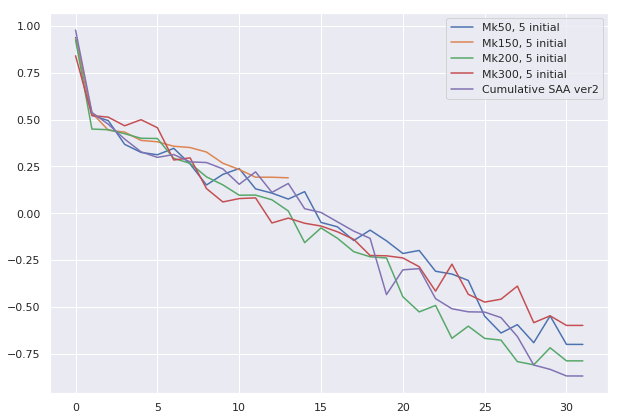

In [59]:
plt.figure(figsize=(10,7))
#plt.plot(irs_initial5_Mk10_Mj1_median[3:], label="Mk10, 5 initial")
plt.plot(irs_initial5_Mk50_Mj1_median[3:], label='Mk50, 5 initial')
plt.plot(irs_initial5_Mk150_Mj1_median[3:], label='Mk150, 5 initial')
plt.plot(irs_initial5_Mk200_Mj1_median[3:], label='Mk200, 5 initial')

plt.plot(irs_initial5_Mk300_Mj1_median[3:], label='Mk300, 5 initial')
plt.plot(irs_saa_cumulative_v2_median[3:], label="Cumulative SAA ver2")

plt.legend()
plt.show()

### Hyperprior에 따른 성능

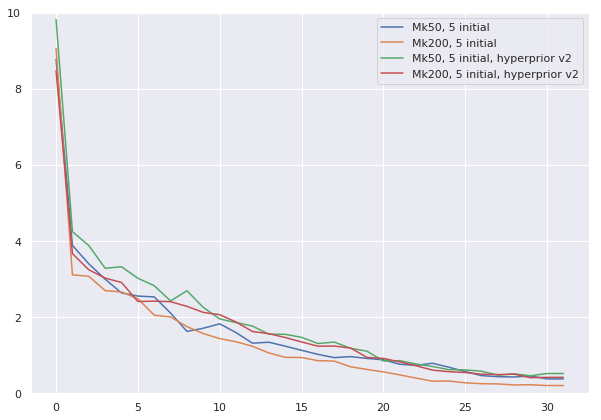

In [26]:
plt.figure(figsize=(10,7))

# plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")


plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")


#lt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial")
# plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")

plt.plot(avg_sugg_obj_initial5_Mk50_Mj1_hyperprior_v2[3:], label="Mk50, 5 initial, hyperprior v2")
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1_hyperprior_v2[3:], label="Mk200, 5 initial, hyperprior v2")
#lt.plot(avg_sugg_obj_initial5_Mk250_Mj1_hyperprior_v2[3:], label="Mk250, 5 initial, hyperprior v2")

#plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")
#plt.plot(avg_sugg_obj_cumulative_multi[3:], label="cumulative SAA, multiStart")
plt.ylim(ymin=0, ymax=10)
plt.legend()
plt.show()

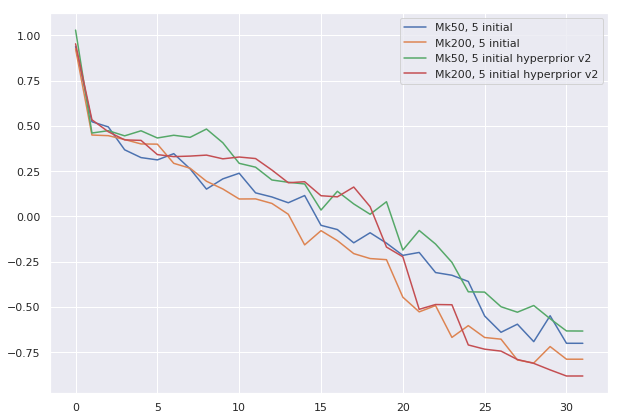

In [27]:
plt.figure(figsize=(10,7))

plt.plot(irs_initial5_Mk50_Mj1_median[3:], label='Mk50, 5 initial')
plt.plot(irs_initial5_Mk200_Mj1_median[3:], label='Mk200, 5 initial')

plt.plot(irs_initial5_Mk50_Mj1_hyperprior_v2_median[3:], label='Mk50, 5 initial hyperprior v2')
plt.plot(irs_initial5_Mk200_Mj1_hyperprior_v2_median[3:], label='Mk200, 5 initial hyperprior v2')



plt.legend()
plt.show()

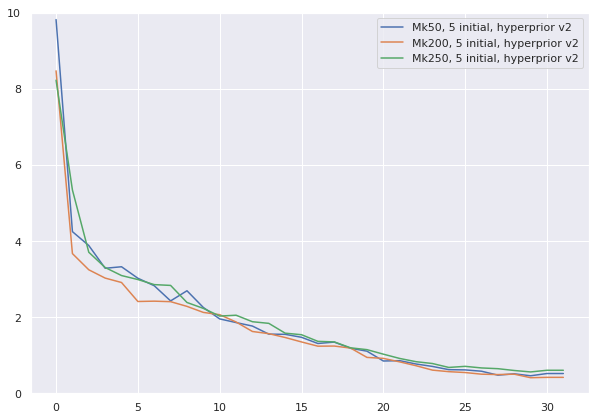

In [28]:
plt.figure(figsize=(10,7))

plt.plot(avg_sugg_obj_initial5_Mk50_Mj1_hyperprior_v2[3:], label="Mk50, 5 initial, hyperprior v2")

plt.plot(avg_sugg_obj_initial5_Mk200_Mj1_hyperprior_v2[3:], label="Mk200, 5 initial, hyperprior v2")


plt.plot(avg_sugg_obj_initial5_Mk250_Mj1_hyperprior_v2[3:], label="Mk250, 5 initial, hyperprior v2")

#plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")

plt.ylim(ymin=0, ymax=10)
plt.legend()
plt.show()

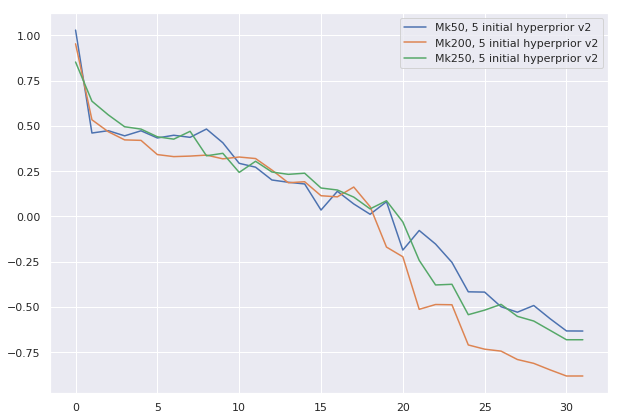

In [29]:
plt.figure(figsize=(10,7))

plt.plot(irs_initial5_Mk50_Mj1_hyperprior_v2_median[3:], label='Mk50, 5 initial hyperprior v2')
plt.plot(irs_initial5_Mk200_Mj1_hyperprior_v2_median[3:], label='Mk200, 5 initial hyperprior v2')
plt.plot(irs_initial5_Mk250_Mj1_hyperprior_v2_median[3:], label='Mk250, 5 initial hyperprior v2')



plt.legend()
plt.show()

In [30]:
cumulative_saa_v2_mks_exp = functions.get_mks(recomm_saa_cumulative_v2_exp)

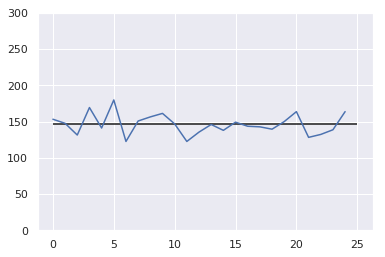

In [31]:
each_iter_avg_mk = [ np.average(cumulative_saa_v2_mks_exp[iter_num][4:], axis=0) for iter_num in range(len(cumulative_saa_v2_mks_exp))]
plt.plot(each_iter_avg_mk)
plt.hlines(np.average(each_iter_avg_mk), xmin=0, xmax=25)
plt.ylim(ymin=0, ymax=300)
plt.show()

### Plotting with error

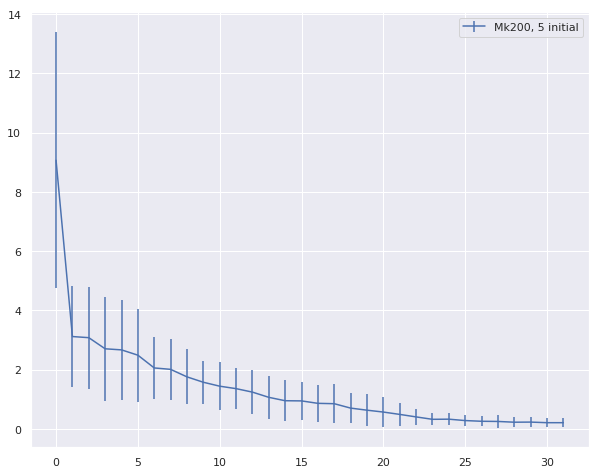

In [32]:
plt.figure(figsize=(10,8))
plt.errorbar([iter_num for iter_num in range(len(avg_sugg_obj_initial5_Mk200_Mj1)-3)],
             avg_sugg_obj_initial5_Mk200_Mj1[3:],
            sugg_obj_initial5_Mk200_Mj1_std_err[3:], label = "Mk200, 5 initial")
# plt.errorbar([iter_num for iter_num in range(len(avg_sugg_obj_initial5_Mk200_Mj1)-3)],
#              avg_sugg_obj_initial5_Mk10_Mj1[3:],
#             sugg_obj_initial5_Mk10_Mj1_std_err[3:], label = "Mk200, 5 initial")
plt.legend()

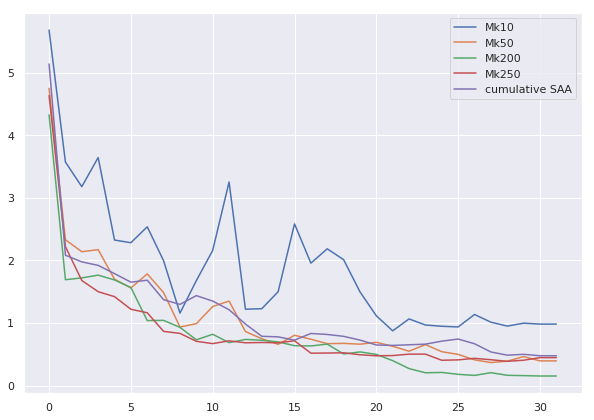

In [33]:
plt.figure(figsize=(10,7))

plt.plot(sugg_obj_initial5_Mk10_Mj1_std_err[3:],label="Mk10")
plt.plot(sugg_obj_initial5_Mk50_Mj1_std_err[3:],label="Mk50")
plt.plot(sugg_obj_initial5_Mk200_Mj1_std_err[3:],label="Mk200")
plt.plot(sugg_obj_initial5_Mk250_Mj1_std_err[3:],label="Mk250")
#plt.plot(sugg_obj_initial5_Mk300_Mj1_std_err[3:],label="Mk300")
plt.plot(sugg_obj_cumulative_saa_multi_std_err[3:], label="cumulative SAA")
#plt.ylim(ymin=0, ymax=10)
plt.legend()


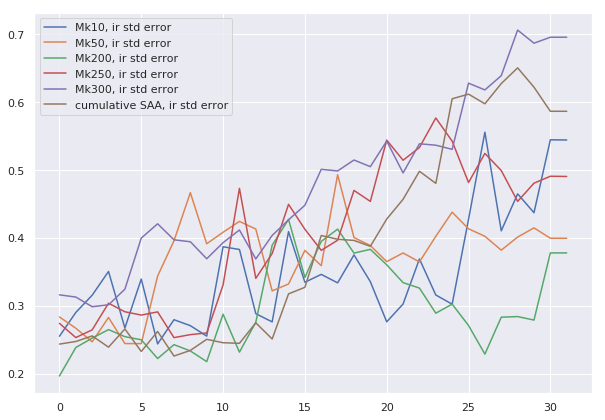

In [34]:
plt.figure(figsize=(10,7))
plt.plot(irs_initial5_Mk10_Mj1_std_err[3:], label="Mk10, ir std error")
plt.plot(irs_initial5_Mk50_Mj1_std_err[3:], label="Mk50, ir std error")
plt.plot(irs_initial5_Mk200_Mj1_std_err[3:], label="Mk200, ir std error")
plt.plot(irs_initial5_Mk250_Mj1_std_err[3:], label="Mk250, ir std error")
plt.plot(irs_initial5_Mk300_Mj1_std_err[3:], label="Mk300, ir std error")
plt.plot(irs_cumulative_saa_multi_std_err[3:], label="cumulative SAA, ir std error")
plt.legend()
plt.show()

In [35]:
cumulative_saa_mks_exp = functions.get_mks(recomm_saa_cumulative_exp)

In [36]:
avg_mks = [np.average(mks_exp[4:]) for mks_exp in cumulative_saa_mks_exp]

In [37]:
avg_mks

[159.67741935483872,
 161.29032258064515,
 156.4516129032258,
 170.16129032258064,
 165.32258064516128,
 129.03225806451613,
 143.5483870967742,
 188.70967741935485,
 154.03225806451613,
 196.7741935483871,
 127.41935483870968,
 159.67741935483872,
 160.48387096774192,
 150.80645161290323,
 168.5483870967742,
 166.93548387096774,
 170.16129032258064,
 134.67741935483872,
 137.09677419354838,
 199.19354838709677,
 132.25806451612902,
 137.90322580645162,
 170.16129032258064,
 153.2258064516129,
 181.4516129032258]

In [38]:
np.average(avg_mks)

159.0